Name: Karthikeyan K

Register Number: 212221230046

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

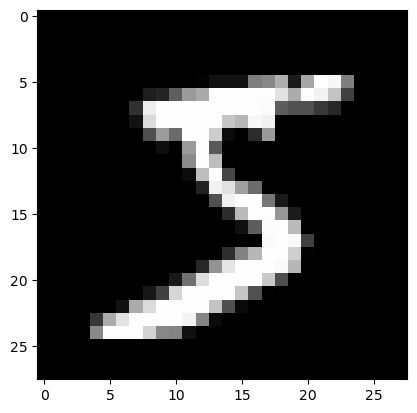

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

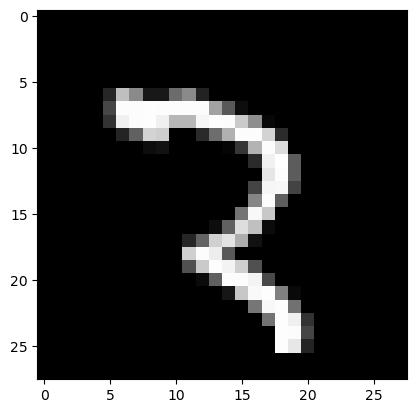

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: Karthikeyan K

Register Number: 212221230046

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='tanh')) 
model.add(layers.Dense(10, activation ='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 32)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 201386 (786.66 KB)
Trainable params: 201386 (786.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [23]:
# Choose the appropriate parameters
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2646 - accuracy: 0.9298 - val_loss: 0.1042 - val_accuracy: 0.9718
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0870 - accuracy: 0.9758 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0584 - accuracy: 0.9835 - val_loss: 0.0548 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0437 - accuracy: 0.9878 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0353 - accuracy: 0.9904 - val_loss: 0.0516 - val_accuracy: 0.9823


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.264587,0.929783,0.104215,0.9718
1,0.086989,0.975833,0.065248,0.9800
2,0.058363,0.983517,0.054823,0.9829
3,0.043670,0.987817,0.053773,0.9830
4,0.035289,0.990350,0.051619,0.9823


<Axes: >

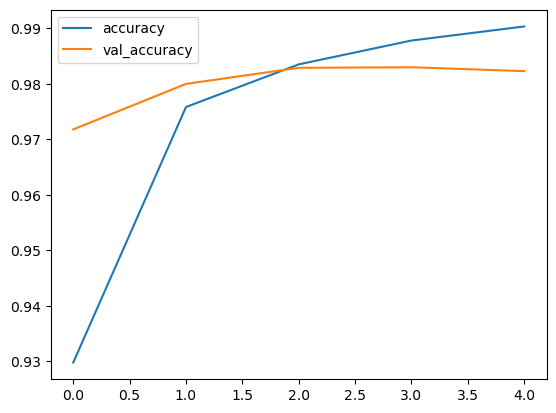

In [27]:
metrics[['accuracy','val_accuracy']].plot()

Karthikeyan
212221230046


<Axes: >

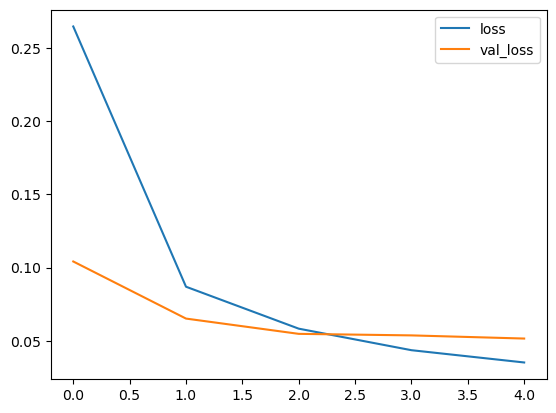

In [42]:
print("Karthikeyan\n212221230046")
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [43]:
print("Karthikeyan\n212221230046")
print(confusion_matrix(y_test,x_test_predictions))

Karthikeyan
212221230046
[[ 976    1    1    0    0    0    0    2    0    0]
 [   1 1128    3    0    0    0    1    2    0    0]
 [   4    2 1007    6    1    0    0    6    5    1]
 [   0    0    1 1005    0    1    0    1    1    1]
 [   1    1    3    0  967    0    2    0    1    7]
 [   3    0    1   17    0  868    1    0    1    1]
 [  11    2    0    1    9    2  929    0    4    0]
 [   2    1    4    2    0    0    0 1010    2    7]
 [   5    0    3    5    0    2    0    3  949    7]
 [   2    4    1    4    7    3    0    3    1  984]]


In [44]:
print("Karthikeyan\n212221230046")
print(classification_report(y_test,x_test_predictions))

Karthikeyan
212221230046
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [33]:
img = image.load_img('imagefive.jpeg')

In [34]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [35]:
img = image.load_img('imagefive.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [36]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 20ms/step


In [37]:
print(x_single_prediction)

[5]


Karthikeyan
212221230046



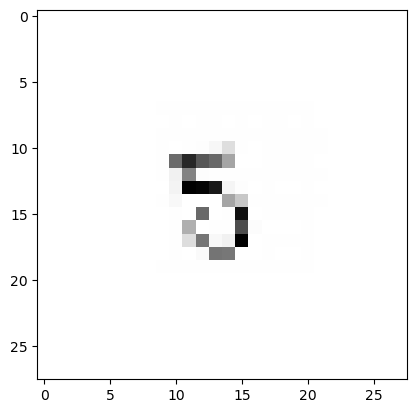

In [45]:
print("Karthikeyan\n212221230046\n")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [39]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 18ms/step


In [46]:
print("Karthikeyan\n212221230046\n")
print(x_single_prediction)

Karthikeyan
212221230046

[5]
